In [134]:
import pandas as pd
import matplotlib.pyplot as plt


# Plt Style
plt.style.use("bmh") 


# Dataframe
df = pd.read_csv(r"D:\Python Course\Exercise Pt2\csv\Online_Store_Sales.csv")

In [135]:
# Monthly revenue
df["Date"] = pd.to_datetime(df["Date"])
df1 = df.set_index(df["Date"])
monthly = df1["Revenue"].resample("ME").sum()
monthly

Date
2023-01-31    42141.70
2023-02-28    34370.96
2023-03-31    33312.03
2023-04-30    35264.58
2023-05-31    36978.02
2023-06-30    30539.02
2023-07-31    36219.79
2023-08-31    28024.68
2023-09-30    35317.90
2023-10-31    47090.93
2023-11-30    43664.18
2023-12-31    44435.18
Freq: ME, Name: Revenue, dtype: float64

In [136]:
# Top 5 Selling Product
prodSell = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)
prodSell.head(5)

Product
Keyboard      82054.49
Monitor       69588.21
Headphones    66091.62
Smartphone    64367.69
Mouse         61993.88
Name: Revenue, dtype: float64

In [137]:
# Revenue by country
ctrRev = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False)
ctrRev

Country
USA          89629.19
Canada       81935.45
Australia    77442.58
France       69732.79
Germany      67237.63
UK           61381.33
Name: Revenue, dtype: float64

In [138]:
# Average Quantity / Category
catQty = df.groupby("Category")["Quantity"].mean().sort_values(ascending=False)
catQty

Category
Accessories    2.863905
Electronics    2.854962
Name: Quantity, dtype: float64

In [139]:
# Most Used Payment Method
payMeth = df["PaymentMethod"].value_counts().sort_values(ascending=False)
payMeth

PaymentMethod
Cash             82
Credit Card      81
Bank Transfer    79
PayPal           58
Name: count, dtype: int64

Text(0, 0.5, 'Revenue')

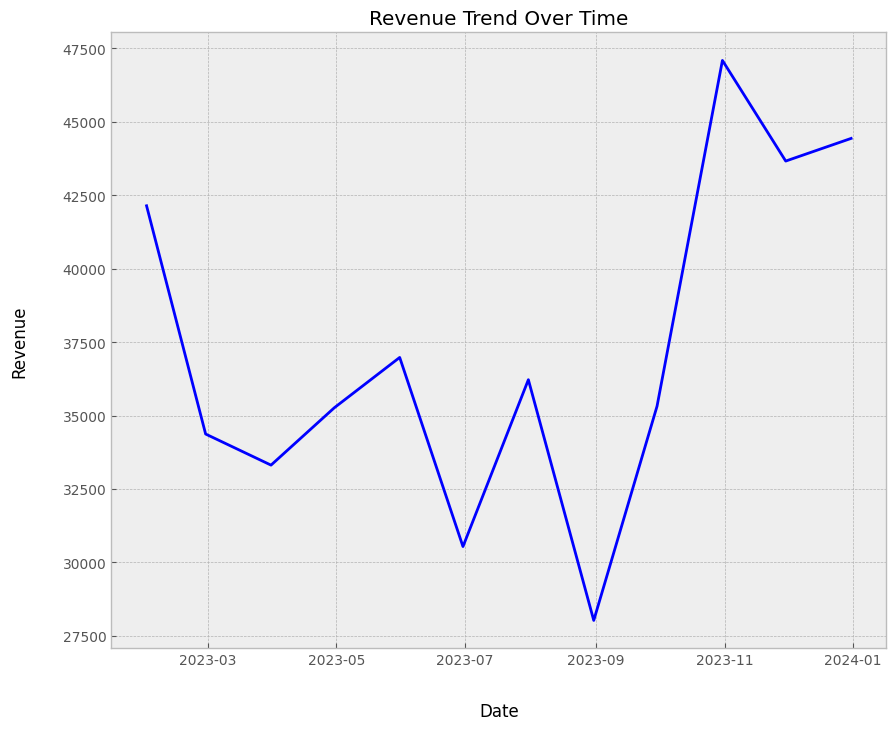

In [140]:
# Line Plot Revenue Trend Over Time
rev = df1["Revenue"].resample("ME").sum()
date = rev.index

plt.figure(figsize=(10, 8))
plt.plot(date, rev, color="blue")
plt.title("Revenue Trend Over Time")
plt.xlabel("Date", color="black", labelpad=25)
plt.ylabel("Revenue", color="black", labelpad=25)

Text(0, 0.5, 'Revenue')

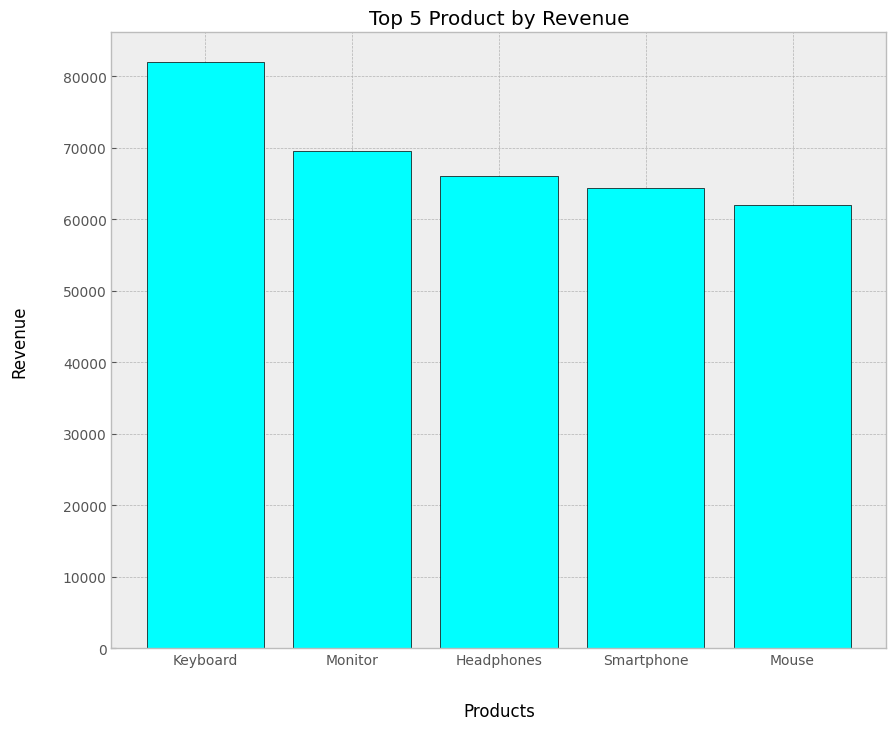

In [152]:
# Bar chart Top 5 Product by Revenue

topProd = prodSell.head(5)
prod = topProd.index

plt.figure(figsize=(10, 8))
plt.bar(prod, topProd, edgecolor = "black", color="cyan")
plt.title("Top 5 Product by Revenue")
plt.xlabel("Products", color="black", labelpad=25)
plt.ylabel("Revenue", color="black", labelpad=25)


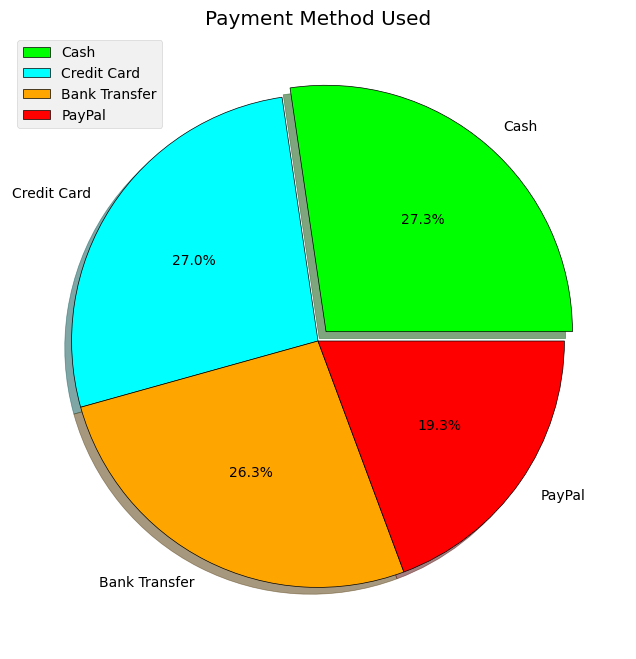

In [183]:
# Pie Chart Payment Method Used

method = payMeth.index
colorss = ["lime", "cyan", "orange", "red"]
explodes = [0.05, 0, 0, 0]
plt.figure(figsize=(10, 8))
plt.pie(payMeth.values, labels=payMeth.index, colors=colorss, shadow=True, wedgeprops={'edgecolor':'black'}, explode=explodes, autopct="%1.1f%%")
plt.title("Payment Method Used")
plt.legend()

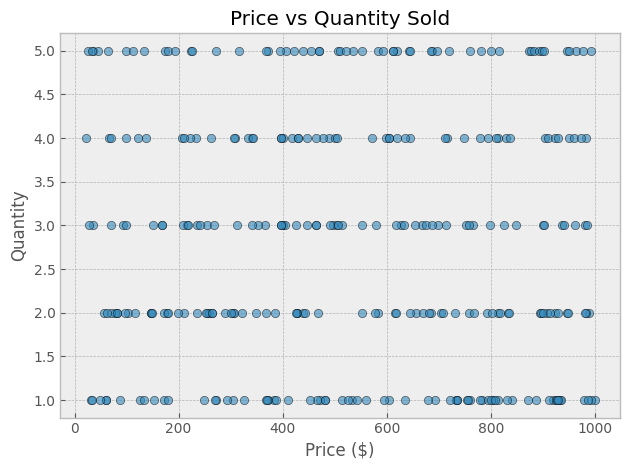

In [196]:
# Scatter Price vs Qty
df.head(1)
Prc = df1["Price"]
Qty = df1["Quantity"]

plt.scatter(df['Price'], df['Quantity'], alpha=0.6, edgecolors='black')
plt.title("Price vs Quantity Sold")
plt.xlabel("Price ($)")
plt.ylabel("Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

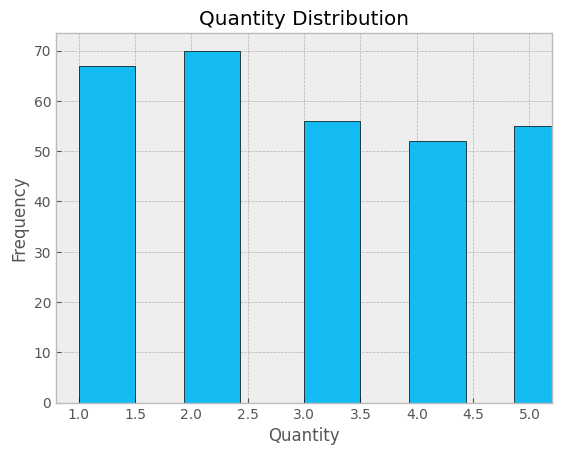

In [227]:
# Histogram: Quantity distribution
qty = df["Quantity"]
plt.hist(qty, bins=30, edgecolor= "black", color='#13bbf2', width=0.5)
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
